<table>
    <tr><td align="right" style="background-color:#ffffff;">
        <img src="../images/logot.png" width="20%" align="right">
    </td></tr>
    <tr><td align="right" style="color:#777777;background-color:#ffffff;font-size:12px;">
        Prepared by Özlem Salehi | April 30, 2020<br>
    </td></tr>
    <tr><td align="right" style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;">
        This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros.
    </td></tr>
</table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\vhadamardzero}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\vhadamardone}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $

<h2> <font color="blue"> Solutions </font> for Implementation of Classical Gates Using Quantum Circuits </h2>

<a id="task2"></a>
<h3> Task 2 </h3> 

Write the table for AND gate for three inputs and three outputs. Which operator implements reversible AND?

<h3>Solution</h3>

$
AND: \begin{array}{ccc|ccc} \mathbf{In} & \mathbf{In}& \mathbf{In} & \mathbf{Out}& \mathbf{Out}& \mathbf{Out} \\ 
    \hline 0 & 0 & 0 & 0 & 0 & 0 \\ 
    \hline 0 & 1 & 0 & 0 & 1 & 0 \\ 
    \hline 1 & 0 & 0 & 1 & 0 & 0 \\
    \hline 1 & 1 & 0 & 1 & 1 & 1 \\ 
    \end{array}
    $
    
    This is the Toffoli, or ccx gate.

<a id="task3"></a>
<h3> Task 3 </h3> 

Find a circuit for implementing OR gate. Test your circuit on all possible two bit inputs.

<h3>Solution</h3>

Input $|00\rangle$

In [5]:
# draw the circuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)
creg1 = ClassicalRegister(3)

mycircuit1 = QuantumCircuit(qreg1,creg1)

mycircuit1.cx(qreg1[0],qreg1[2])
mycircuit1.cx(qreg1[1],qreg1[2])
mycircuit1.ccx(qreg1[0],qreg1[1],qreg1[2])

mycircuit1.measure(qreg1,creg1)

job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit1)
for outcome in counts: # for each key-value in dictionary
    reverse_outcome = ''
    for i in outcome: # each string can be considered as a list of characters
        reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    print(reverse_outcome,"is observed",counts[outcome],"times")


000 is observed 1000 times


Input $|01\rangle$

In [6]:
# draw the circuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)
creg1 = ClassicalRegister(3)

mycircuit1 = QuantumCircuit(qreg1,creg1)

mycircuit1.x(qreg1[1])

mycircuit1.cx(qreg1[0],qreg1[2])
mycircuit1.cx(qreg1[1],qreg1[2])
mycircuit1.ccx(qreg1[0],qreg1[1],qreg1[2])

mycircuit1.measure(qreg1,creg1)

job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit1)
for outcome in counts: # for each key-value in dictionary
    reverse_outcome = ''
    for i in outcome: # each string can be considered as a list of characters
        reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    print(reverse_outcome,"is observed",counts[outcome],"times")


011 is observed 1000 times


Input $|10\rangle$

In [7]:
# draw the circuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)
creg1 = ClassicalRegister(3)

mycircuit1 = QuantumCircuit(qreg1,creg1)

mycircuit1.x(qreg1[0])

mycircuit1.cx(qreg1[0],qreg1[2])
mycircuit1.cx(qreg1[1],qreg1[2])
mycircuit1.ccx(qreg1[0],qreg1[1],qreg1[2])

mycircuit1.measure(qreg1,creg1)

job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit1)
for outcome in counts: # for each key-value in dictionary
    reverse_outcome = ''
    for i in outcome: # each string can be considered as a list of characters
        reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    print(reverse_outcome,"is observed",counts[outcome],"times")


101 is observed 1000 times


Input $|11\rangle$

In [8]:
# draw the circuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qreg1 =  QuantumRegister(3)
creg1 = ClassicalRegister(3)

mycircuit1 = QuantumCircuit(qreg1,creg1)

mycircuit1.x(qreg1[0])
mycircuit1.x(qreg1[1])

mycircuit1.cx(qreg1[0],qreg1[2])
mycircuit1.cx(qreg1[1],qreg1[2])
mycircuit1.ccx(qreg1[0],qreg1[1],qreg1[2])

mycircuit1.measure(qreg1,creg1)

job = execute(mycircuit1,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(mycircuit1)
for outcome in counts: # for each key-value in dictionary
    reverse_outcome = ''
    for i in outcome: # each string can be considered as a list of characters
        reverse_outcome = i + reverse_outcome # each new symbol comes before the old symbol(s)
    print(reverse_outcome,"is observed",counts[outcome],"times")


111 is observed 1000 times


<a id="task4"></a>
<h3>Task 4 </h3>

Fredkin gate is a three qubit controlled swap gate which swaps the second and third qubits if the first qubit is in state $ \ket{1} $. It is represented with the following matrix. Implement Fredkin gate using CX anf CCX operators. Define a method named fredkin which takes as parameter a circuit and register. Use unitary simulator to check the unitary matrix corresponding to your circuit. Follow the Qiskit order.

<img src="../images/fredkin.png" width="20%" align="center">

<h3> Solution </h3>

In [18]:
def fredkin(qreg, circuit): # Applies fredkin gate to the input using CX and CCX gates.
    
    circuit.cx(qreg[0],qreg[1])
    circuit.ccx(qreg[2],qreg[1],qreg[0])
    circuit.cx(qreg[0],qreg[1])

  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0


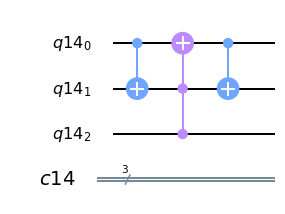

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
simulator_backend = Aer.get_backend('qasm_simulator')

qreg = QuantumRegister(3)
creg = ClassicalRegister(3)

circuit = QuantumCircuit(qreg,creg) # Currently all qubits are at their initial state which is 0.

fredkin(qreg,circuit)
# Now we apply the fredkin gate that we have implemented above, which swaps the second and third qubits
# if the first qubit is in state 1. Since we have applied X gate to the first and second qubits, we expect
# to see the states of second and third qubits swapped. So now the third qubit is in state 1.


job = execute(circuit,Aer.get_backend('unitary_simulator'))
u=job.result().get_unitary(circuit,decimals=3)
for i in range(len(u)):
    s=""
    for j in range(len(u)):
        val = str(u[i][j].real)
        while(len(val)<5): val  = " "+val
        s = s + val
    print(s)

circuit.draw(output="mpl")


circuit.draw(output='mpl') # We can also draw the circuit to better observe it.



<a id="task5"></a>
<h3> Task 5</h3>

What is the state of the output qubit after applying $U_f$ if initially:

- $\ket{y} = \ket{0}$

- $\ket{y} = \ket{1}$

- $\ket{y} = \ket{-}$


<h3> Solution </h3>

- If input is $\ket{0}$, output is $ f(x)$

- If input is $\ket{1}$, output is negation of $f(x)$

- If input is $\ket{-}$

$
U_f \bigl ( \sqrttwo \ket{0}- \sqrttwo \ket{1} \bigr )= \sqrttwo U_f \ket{0} - \sqrttwo U_f \ket{1} =\sqrttwo f(0)-\sqrttwo f(1)
$